# 上一章中介绍了如何使用softmax回归来进行多分类问题，对于一些基本线性模型基本介绍完毕，下面正式进入深度神经网络的学习。先介绍一个比较基础的模型，多层感知机，它是神经网络的最基础模型。首先我们来看看感知机✍

# 1.感知机

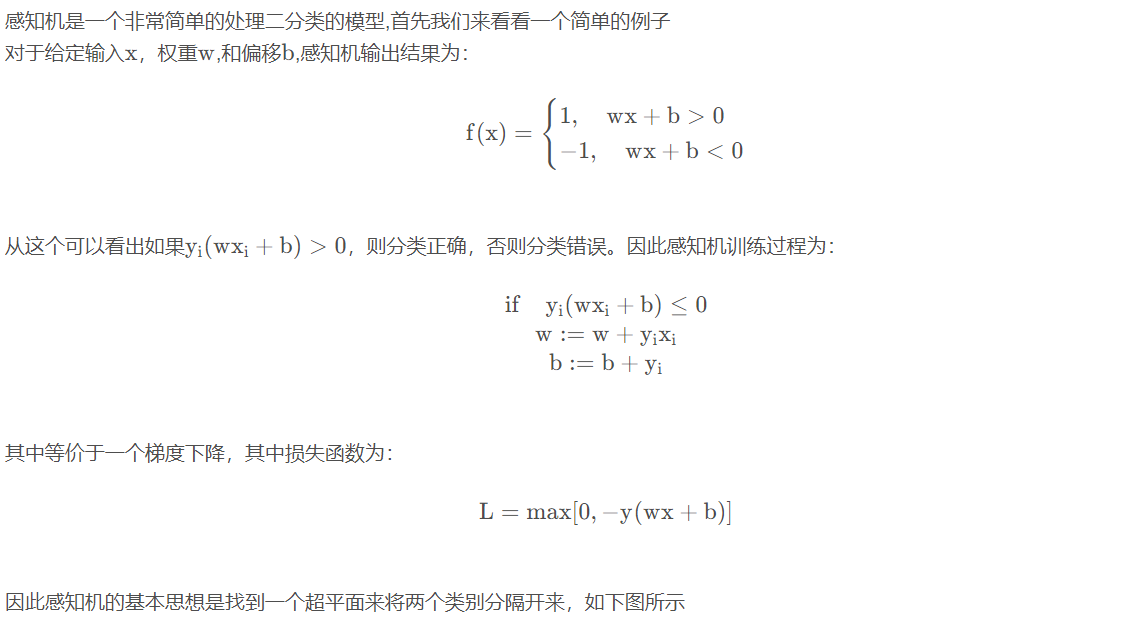

In [1]:
# 导入相关库
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets,transforms
from torch.utils import data
%matplotlib inline


D:\ANnaconda\envs\HBHB\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


D:\ANnaconda\envs\HBHB\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


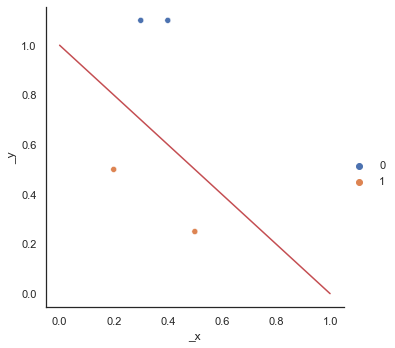

In [4]:
# 创建x,y
x = torch.tensor([[0.5,0.25],[0.2,0.5],[0.3,1.1],[0.4,1.1]])
y = torch.tensor([1,1,0,0])
sns.set(style="white")
sns.relplot(x[:,0],x[:,1],hue=y)
plt.plot([0,1],[1,0],'r')


上面给出的平面将0,1两类完全分隔开来。但是感知机有一个问题是，解决不了异或问题（XOR），下面我们来介绍一下异或问题

# 2.异或问题

异或问题，当两个相同时，返回正类，不同时，返回负类，具体如下所示

D:\ANnaconda\envs\HBHB\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


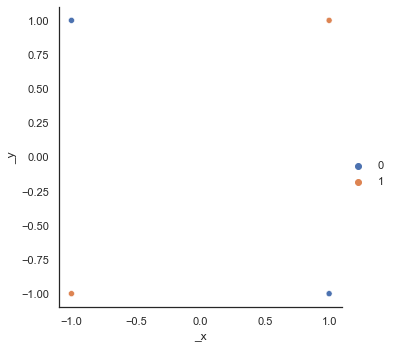

In [5]:
# 创建x,y
x = torch.tensor([[1,1],[-1,1],[-1,-1],[1,-1]])
y = torch.tensor([1,0,1,0])
sns.set(style="white")
sns.relplot(x[:,0],x[:,1],hue=y)


可以看出，在这种情况下，无论如何我们没办法找到一个超平面将其分开，这是一组线性不可分的数据，在这种情况下，感知机解决不了异或问题，因此，神经网络的研究暂缓发展。多年之后，提出了多层感知机，自此开起了神经网络的新发展

# 3多层感知机

多层感知机通过在网络中加入一个或多个隐藏层来克服线性模型的限制，是一个简单的神经网络，也是深度学习的重要基础，具体如下图所示

![title](MLP.jpg)

这是一个具有一个隐藏层的多层感知机，其中输入有4个特征，输出有三个特征，隐藏层有五个隐藏单元，每一层的权重和偏差维度如下：

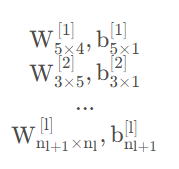

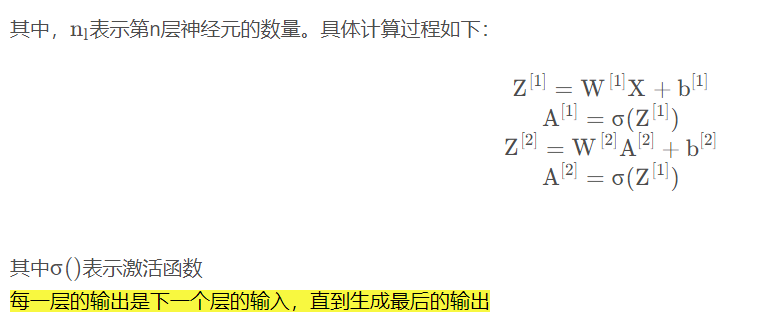

# 4. 激活函数

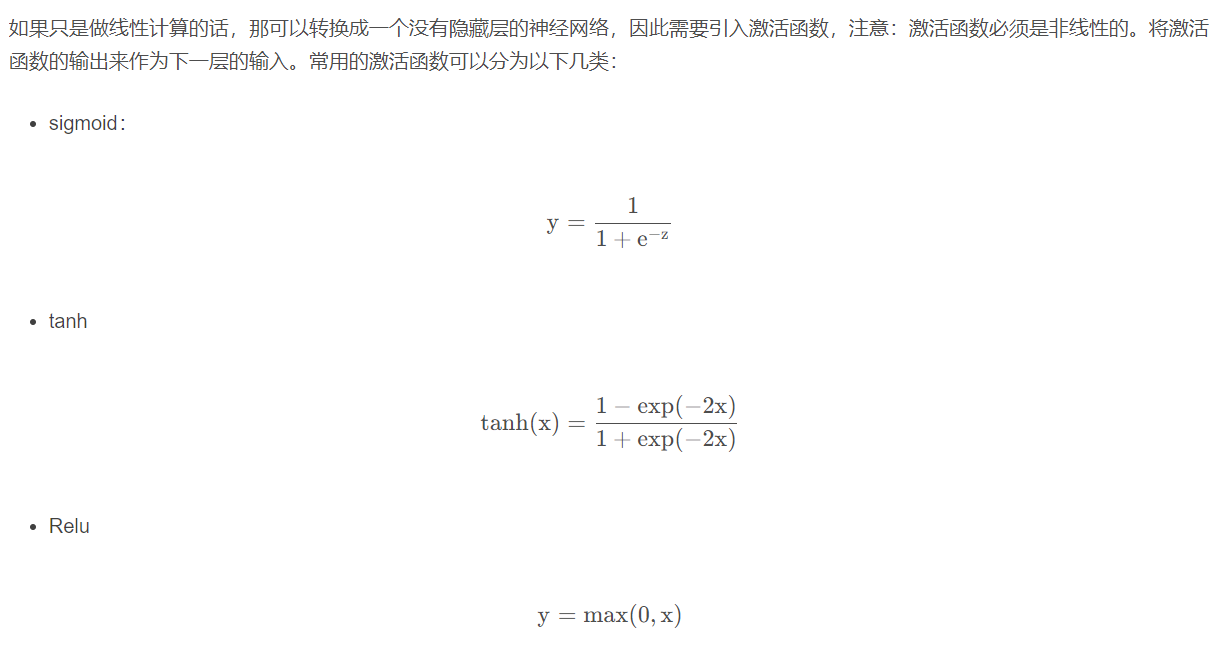

4.1 sigmoid函数

在logistic回归中，我们就运用了sigmoid函数，它能够将输入转换到0-1之间，呈现出S曲线。在处理二分类问题时，可以考虑使用sigmoid函数用于输出层。 具体图形如下

In [2]:
x = torch.arange(-8.0, 8.0, 0.01, requires_grad=True)

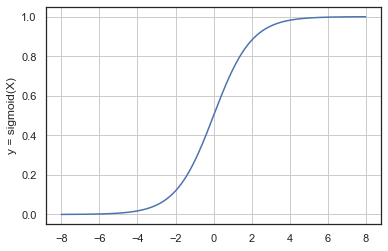

In [6]:
# sigmoid 函数
y = torch.sigmoid(x)
plt.ylabel("y = sigmoid(X)")#y标签
plt.grid(True)#显示网格
plt.plot(x.detach(), y.detach())


可以看出，当接近0时，变化最大，说明此时导数值最大，对sigmoid函数求导，可得它的导数图如下：

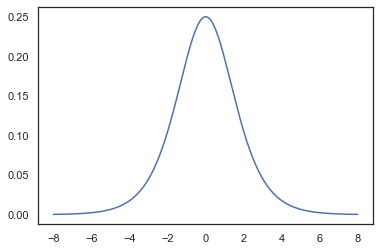

In [7]:
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)


4.2 Relu激活函数

最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）， 因为它实现简单，同时在各种预测任务中表现良好。 ReLU提供了一种非常简单的非线性变换。 给定元素(x)，ReLU函数被定义为该元素与(0)的最大值。因此往往在隐藏层中，我们使用Relu激活函数。其图形如下

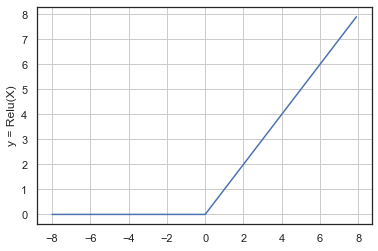

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.ylabel("y = Relu(X)")#y标签
plt.grid(True)#显示网格
plt.plot(x.detach(), y.detach())


可以看出，当输入值为负数，其导数为0，输入值为正时，其导数为1，虽然在0处不可导，但是这种情况一般不会出现，因为输入往往不会为0，下面我们绘制Relu函数的导数

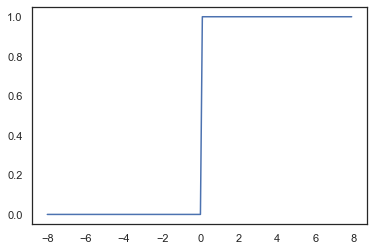

In [9]:
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)


使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。 这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题，当然还有一些Relu函数的变形

4.3 tanh函数

tanh函数与sigmoid函数类似，将输入压缩到(-1,1)之间。其图形如下

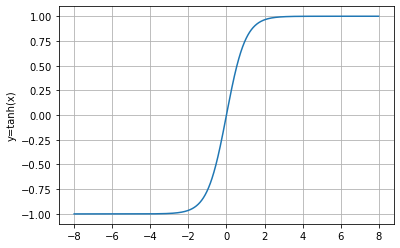

In [3]:
# tanh(x)
y = torch.tanh(x)
plt.ylabel('y=tanh(x)')
plt.grid(True)
plt.plot(x.detach(), y.detach())


可以看出图形结果和sigmoid函数形状基本一致，唯一有区别的是tanh是关于原点对称的，下面对其进行求导，得到以下结果

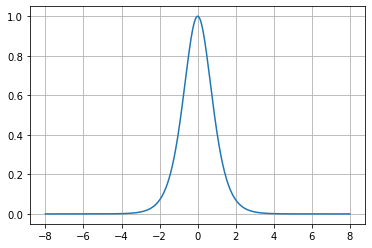

In [4]:
# 清除以前的梯度
y.backward(torch.ones_like(x),retain_graph=True)
plt.grid(True)
plt.plot(x.detach(), x.grad)

#求导的结果也和sigmoid函数结果类似。

# 5.模型训练

数据集导入

In [15]:

trans = transforms.ToTensor()
train = datasets.MNIST(root='../data',download=True,train=True,transform=trans)
test = datasets.MNIST(root='../data',download=True,train=False,transform=trans)
# 分批次加载数据集
batch_size = 64
df_train = data.DataLoader(train, batch_size, shuffle=True,
                          )
df_test = data.DataLoader(test, batch_size, shuffle=True,
                           )
X, y = next(iter(df_train))

参数初始化

In [16]:

num_in,num_out, num_hid = 784,10,64
W1 = nn.Parameter(
    torch.randn(num_in,num_hid,requires_grad=True))
b1 = nn.Parameter(
    torch.zeros(num_hid,requires_grad = True))
W2 = nn.Parameter(torch.randn(num_hid,num_out,requires_grad=True))
b2 = nn.Parameter(
    torch.zeros(num_out))
params = [W1,b1,W2,b2]



定义使用的激活函数

In [17]:

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


计算模型

In [18]:

def net(X):
    X = X.reshape((-1, num_in))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)


损失函数

In [19]:

loss = nn.CrossEntropyLoss(reduction='none')

# SGD优化器
optimizer = torch.optim.SGD(params=params, lr=1)


模型训练

In [20]:
for epoch in range(1000):
    optimizer.zero_grad()
    hypothesis = net(X)
    cost = loss(hypothesis, y)
    cost.mean().backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.mean().item())


0 97.27185821533203
100 0.5295373201370239
200 0.2241615653038025
300 0.2557723820209503
400 0.12960389256477356
500 0.11431573331356049
600 0.10785913467407227
700 0.10418032109737396
800 0.10175449401140213
900 0.09996192157268524


# 6.简洁代码实现

In [1]:
'''
定义模型
'''
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10))
'''
初始化权重
'''
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)
'''
损失函数
'''
loss = nn.CrossEntropyLoss()
'''
SGD优化器
'''
trainer = torch.optim.SGD(net.parameters(), lr=0.1)
'''
模型训练
'''
for epoch in range(1000):
    trainer.zero_grad()
    hypothesis = net(X)
    cost = loss(hypothesis, y)
    cost.backward()
    trainer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())


NameError: name 'nn' is not defined